In [39]:
%load_ext autoreload
%autoreload 2

import xarray as xa

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# CDS CMIP

In [40]:
thetao_concatted = xa.open_dataset("/home/rt582/rds/hpc-work/coralshift/data/env_vars/cmip6/BCC-CSM2-HR/r1i1p1f1/concatted_vars/thetao_lats_-40-0_lons_130-170.nc")

<xarray.Dataset>
Dimensions:    (time: 780, bnds: 2, lev: 1, lat: 160, lon: 160)
Coordinates:
  * time       (time) datetime64[ns] 1950-01-16T12:00:00 ... 2014-12-16T12:00:00
  * lev        (lev) float64 5.0
  * lat        (lat) float64 -39.88 -39.62 -39.38 ... -0.625 -0.375 -0.125
  * lon        (lon) float64 130.1 130.4 130.6 130.9 ... 169.1 169.4 169.6 169.9
    latitude   (lat, lon) float32 ...
    longitude  (lat, lon) float32 ...
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] ...
    lev_bnds   (time, lev, bnds) float64 ...
    lat_bnds   (time, lat, bnds) float64 ...
    lon_bnds   (time, lon, bnds) float64 ...
    uo         (time, lev, lat, lon) float32 ...
    so         (time, lev, lat, lon) float32 ...
    vo         (time, lev, lat, lon) float32 ...
    thetao     (time, lev, lat, lon) float32 ...
    tos        (time, lat, lon) float32 ...
Attributes: (12/49)
    Conventions:                     CF-1.7 CMIP-6.2
    activity_id:                     HighResMIP
    branch_method:                   Standard
    branch_time_in_child:            0.0
    branch_time_in_parent:           0.0
    comment:                         The model integration starts from the pi...
    ...                              ...
    tracking_id:                     hdl:21.14100/a9515288-7519-4213-9937-422...
    variable_id:                     uo
    variant_label:                   r1i1p1f1
    license:                         CMIP6 model data produced by BCC is lice...
    cmor_version:                    3.3.2
    DODS_EXTRA.Unlimited_Dimension:  time

In [42]:
from coralshift.dataloading import config

In [75]:
concatted_dir = Path("/home/rt582/rds/hpc-work/coralshift/data/env_vars/cmip6/BCC-CSM2-HR/r1i1p1f1/concatted_vars")
var_nc_fs = list(Path(concatted_dir).glob("*.nc"))

vars = [str(fname.name).split("_")[0] for fname in var_nc_fs]
concatted_name = "_".join(vars) + ".nc"
concatted_name

'uo_so_vo_thetao_tos.nc'

In [76]:
var_nc_fs

[PosixPath('/home/rt582/rds/hpc-work/coralshift/data/env_vars/cmip6/BCC-CSM2-HR/r1i1p1f1/concatted_vars/uo_lats_-40-0_lons_130-170.nc'),
 PosixPath('/home/rt582/rds/hpc-work/coralshift/data/env_vars/cmip6/BCC-CSM2-HR/r1i1p1f1/concatted_vars/so_lats_-40-0_lons_130-170.nc'),
 PosixPath('/home/rt582/rds/hpc-work/coralshift/data/env_vars/cmip6/BCC-CSM2-HR/r1i1p1f1/concatted_vars/vo_lats_-40-0_lons_130-170.nc'),
 PosixPath('/home/rt582/rds/hpc-work/coralshift/data/env_vars/cmip6/BCC-CSM2-HR/r1i1p1f1/concatted_vars/thetao_lats_-40-0_lons_130-170.nc'),
 PosixPath('/home/rt582/rds/hpc-work/coralshift/data/env_vars/cmip6/BCC-CSM2-HR/r1i1p1f1/concatted_vars/tos_lats_-40-0_lons_130-170.nc')]

In [82]:
dss = [xa.open_dataset(fname) for fname in var_nc_fs]
merged = xa.merge(dss)
merged

<xarray.Dataset>
Dimensions:    (time: 780, bnds: 2, lev: 1, lat: 160, lon: 160)
Coordinates:
  * time       (time) datetime64[ns] 1950-01-16T12:00:00 ... 2014-12-16T12:00:00
  * lev        (lev) float64 5.0
  * lat        (lat) float64 -39.88 -39.62 -39.38 ... -0.625 -0.375 -0.125
  * lon        (lon) float64 130.1 130.4 130.6 130.9 ... 169.1 169.4 169.6 169.9
    latitude   (lat, lon) float32 -39.88 -39.88 -39.88 ... -0.125 -0.125 -0.125
    longitude  (lat, lon) float32 -229.9 -229.6 -229.4 ... -190.6 -190.4 -190.1
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object 1950-01-01 00:00:00 ... 2015-01-01 00:00:00
    lev_bnds   (time, lev, bnds) float64 0.0 10.0 0.0 10.0 ... 0.0 10.0 0.0 10.0
    lat_bnds   (time, lat, bnds) float64 -40.0 -39.75 -39.75 ... -0.25 -0.25 0.0
    lon_bnds   (time, lon, bnds) float64 130.0 130.2 130.2 ... 169.8 169.8 170.0
    uo         (time, lev, lat, lon) float32 ...
    so         (time, lev, lat, lon) float32 ...
    vo         (time, lev, lat, lon) float32 ...
    thetao     (time, lev, lat, lon) float32 ...
    tos        (time, lat, lon) float32 ...
Attributes: (12/49)
    Conventions:                     CF-1.7 CMIP-6.2
    activity_id:                     HighResMIP
    branch_method:                   Standard
    branch_time_in_child:            0.0
    branch_time_in_parent:           0.0
    comment:                         The model integration starts from the pi...
    ...                              ...
    tracking_id:                     hdl:21.14100/a9515288-7519-4213-9937-422...
    variable_id:                     uo
    variant_label:                   r1i1p1f1
    license:                         CMIP6 model data produced by BCC is lice...
    cmor_version:                    3.3.2
    DODS_EXTRA.Unlimited_Dimension:  time

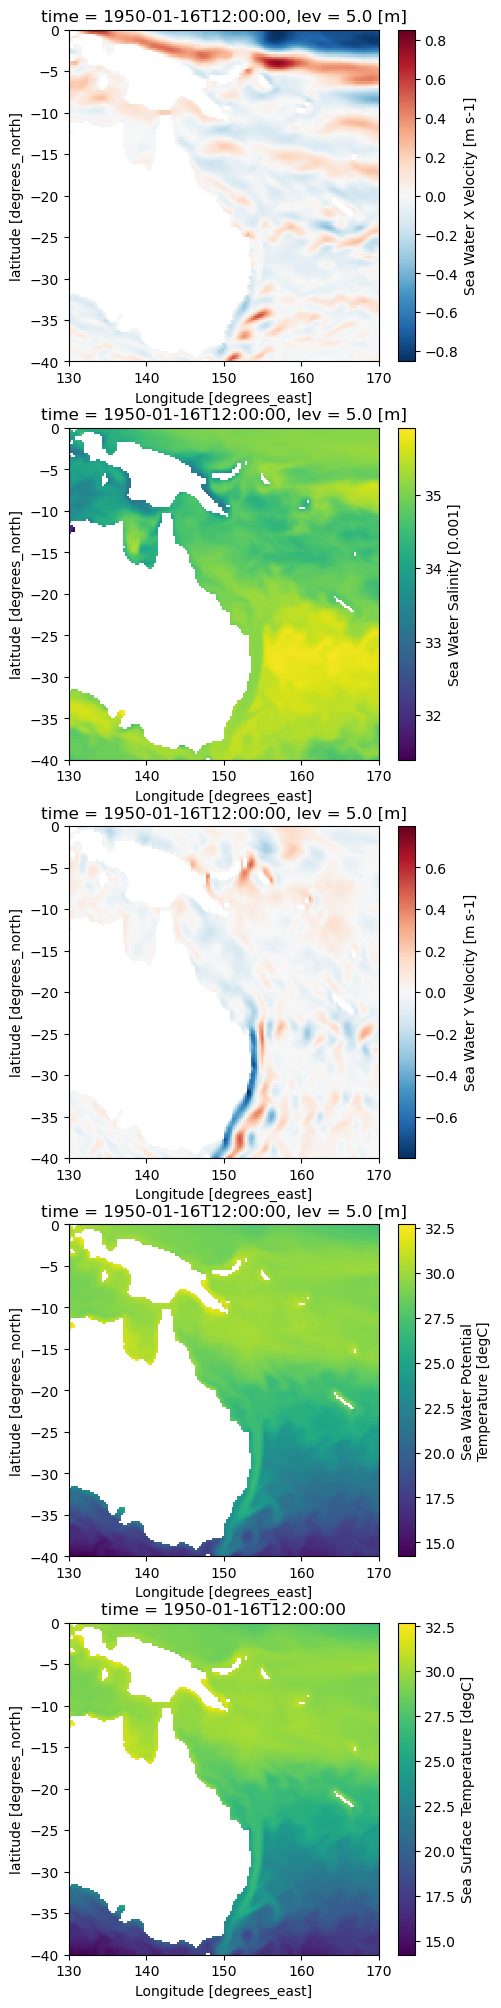

In [92]:
vars = ["uo", "so", "vo", "thetao", "tos"]

merged = xa.open_dataset("/home/rt582/rds/hpc-work/coralshift/data/env_vars/cmip6/BCC-CSM2-HR/r1i1p1f1/uo_so_vo_thetao_tos.nc")

f,ax = plt.subplots(nrows=len(vars), figsize=(5, 25))

for i, var in enumerate(vars):
    ds = merged[var].isel(time=0)
    if "lev" in ds.coords:
        ds = ds.isel(lev=0)

    ds.plot(ax=ax[i])


# merged["so"].isel(time=0).plot()

In [56]:
xa.open_mfdataset(var_nc_fs, combine="nested", concat_dim="time")

<xarray.Dataset>
Dimensions:    (time: 3900, bnds: 2, lev: 1, lat: 160, lon: 160)
Coordinates:
  * time       (time) datetime64[ns] 1950-01-16T12:00:00 ... 2014-12-16T12:00:00
  * lev        (lev) float64 5.0
  * lat        (lat) float64 -39.88 -39.62 -39.38 ... -0.625 -0.375 -0.125
  * lon        (lon) float64 130.1 130.4 130.6 130.9 ... 169.1 169.4 169.6 169.9
    latitude   (lat, lon) float32 dask.array<chunksize=(160, 160), meta=np.ndarray>
    longitude  (lat, lon) float32 dask.array<chunksize=(160, 160), meta=np.ndarray>
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object dask.array<chunksize=(780, 2), meta=np.ndarray>
    lev_bnds   (time, lev, bnds) float64 dask.array<chunksize=(780, 1, 2), meta=np.ndarray>
    lat_bnds   (time, lat, bnds) float64 dask.array<chunksize=(780, 160, 2), meta=np.ndarray>
    lon_bnds   (time, lon, bnds) float64 dask.array<chunksize=(780, 160, 2), meta=np.ndarray>
    thetao     (time, lev, lat, lon) float32 dask.array<chunksize=(780, 1, 160, 160), meta=np.ndarray>
    so         (time, lev, lat, lon) float32 dask.array<chunksize=(3900, 1, 160, 160), meta=np.ndarray>
Attributes: (12/50)
    Conventions:                     CF-1.7 CMIP-6.2
    activity_id:                     HighResMIP
    branch_method:                   Standard
    branch_time_in_child:            0.0
    branch_time_in_parent:           0.0
    comment:                         The model integration starts from the pi...
    ...                              ...
    tracking_id:                     hdl:21.14100/d7c136d8-fd4b-49e5-b10a-e4e...
    variable_id:                     thetao
    variant_label:                   r1i1p1f1
    license:                         CMIP6 model data produced by BCC is lice...
    cmor_version:                    3.3.2
    DODS_EXTRA.Unlimited_Dimension:  time

In [72]:
xa.open_dataset(var_nc_fs[0])

<xarray.Dataset>
Dimensions:    (time: 780, bnds: 2, lev: 1, lat: 160, lon: 160)
Coordinates:
  * time       (time) datetime64[ns] 1950-01-16T12:00:00 ... 2014-12-16T12:00:00
  * lev        (lev) float64 5.0
  * lat        (lat) float64 -39.88 -39.62 -39.38 ... -0.625 -0.375 -0.125
  * lon        (lon) float64 130.1 130.4 130.6 130.9 ... 169.1 169.4 169.6 169.9
    latitude   (lat, lon) float32 ...
    longitude  (lat, lon) float32 ...
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object ...
    lev_bnds   (time, lev, bnds) float64 ...
    lat_bnds   (time, lat, bnds) float64 ...
    lon_bnds   (time, lon, bnds) float64 ...
    thetao     (time, lev, lat, lon) float32 ...
Attributes: (12/50)
    Conventions:                     CF-1.7 CMIP-6.2
    activity_id:                     HighResMIP
    branch_method:                   Standard
    branch_time_in_child:            0.0
    branch_time_in_parent:           0.0
    comment:                         The model integration starts from the pi...
    ...                              ...
    tracking_id:                     hdl:21.14100/d7c136d8-fd4b-49e5-b10a-e4e...
    variable_id:                     thetao
    variant_label:                   r1i1p1f1
    license:                         CMIP6 model data produced by BCC is lice...
    cmor_version:                    3.3.2
    DODS_EXTRA.Unlimited_Dimension:  time

In [55]:
xa.open_dataset(var_nc_fs[1])

<xarray.Dataset>
Dimensions:    (time: 780, bnds: 2, lev: 1, lat: 160, lon: 160)
Coordinates:
  * time       (time) datetime64[ns] 1950-01-16T12:00:00 ... 2014-12-16T12:00:00
  * lev        (lev) float64 5.0
  * lat        (lat) float64 -39.88 -39.62 -39.38 ... -0.625 -0.375 -0.125
  * lon        (lon) float64 130.1 130.4 130.6 130.9 ... 169.1 169.4 169.6 169.9
    latitude   (lat, lon) float32 ...
    longitude  (lat, lon) float32 ...
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object ...
    lev_bnds   (time, lev, bnds) float64 ...
    lat_bnds   (time, lat, bnds) float64 ...
    lon_bnds   (time, lon, bnds) float64 ...
    thetao     (time, lev, lat, lon) float32 ...
Attributes: (12/50)
    Conventions:                     CF-1.7 CMIP-6.2
    activity_id:                     HighResMIP
    branch_method:                   Standard
    branch_time_in_child:            0.0
    branch_time_in_parent:           0.0
    comment:                         The model integration starts from the pi...
    ...                              ...
    tracking_id:                     hdl:21.14100/d7c136d8-fd4b-49e5-b10a-e4e...
    variable_id:                     thetao
    variant_label:                   r1i1p1f1
    license:                         CMIP6 model data produced by BCC is lice...
    cmor_version:                    3.3.2
    DODS_EXTRA.Unlimited_Dimension:  time

In [52]:
xa.open_mfdataset(var_nc_fs)

ValueError: Could not find any dimension coordinates to use to order the datasets for concatenation

In [ ]:
if do_merge_by_vars:
    mergedvar_dir = os.path.join(download_folder, "merged_vars")
    assert os.path.exists(mergedvar_dir) and os.path.isdir(
        mergedvar_dir
    ), f"{mergedvar_dir} does not exist or is not a directory"
    var_nc_fs = list(Path(mergedvar_dir).glob("*.nc"))

    vars = [str(fname.name).split("_")[0] for fname in var_nc_fs]
    merged_name = "_".join(vars) + ".nc"
    merged_fp = os.path.join(download_folder, merged_name)

    if not os.path.exists(merged_fp):
        print(f"merging variable files... ", end="", flush=True)
        dss = [xr.open_dataset(fname) for fname in var_nc_fs]
        merged = xr.merge(dss)
        merged.to_netcdf(merged_fp)
    else:
        print(
            f"concatenated file already exists at {concatted_fp}",
            end="",
            flush=True,
        )

In [90]:
conc_var_dir = "/home/rt582/rds/hpc-work/coralshift/data/env_vars/cmip6/BCC-CSM2-HR/r1i1p1f1/concatted_vars"

var_nc_fs = list(Path(conc_var_dir).glob("*.nc"))
var_nc_fs
vars = [str(fname.name).split("_")[0] for fname in var_nc_fs]

concatted_name = "_".join(vars) + ".nc"
concatted_name

'uo_so_vo_thetao_tos.nc'

In [88]:
dss = [xa.open_dataset(fname) for fname in var_nc_fs]
merged = xa.merge(dss)

['uo', 'so', 'vo', 'thetao', 'tos']

In [29]:
temp_dir = Path("/home/rt582/rds/hpc-work/coralshift/data/env_vars/cmip6/BCC-CSM2-HR/r1i1p1f1/so")
nc_fs = list(temp_dir.glob("*.nc"))

combined_ds = xa.open_mfdataset(nc_fs)

In [30]:
combined_ds

<xarray.Dataset>
Dimensions:    (time: 780, bnds: 2, lev: 1, lat: 160, lon: 160)
Coordinates:
  * time       (time) object 1950-01-16 12:00:00 ... 2014-12-16 12:00:00
  * lev        (lev) float64 5.0
  * lat        (lat) float64 -39.88 -39.62 -39.38 ... -0.625 -0.375 -0.125
  * lon        (lon) float64 130.1 130.4 130.6 130.9 ... 169.1 169.4 169.6 169.9
    latitude   (lat, lon) float32 dask.array<chunksize=(160, 160), meta=np.ndarray>
    longitude  (lat, lon) float32 dask.array<chunksize=(160, 160), meta=np.ndarray>
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object dask.array<chunksize=(1, 2), meta=np.ndarray>
    lev_bnds   (time, lev, bnds) float64 dask.array<chunksize=(12, 1, 2), meta=np.ndarray>
    lat_bnds   (time, lat, bnds) float64 dask.array<chunksize=(12, 160, 2), meta=np.ndarray>
    lon_bnds   (time, lon, bnds) float64 dask.array<chunksize=(12, 160, 2), meta=np.ndarray>
    so         (time, lev, lat, lon) float32 dask.array<chunksize=(1, 1, 160, 160), meta=np.ndarray>
Attributes: (12/50)
    Conventions:                     CF-1.7 CMIP-6.2
    activity_id:                     HighResMIP
    branch_method:                   Standard
    branch_time_in_child:            0.0
    branch_time_in_parent:           0.0
    comment:                         The model integration starts from the pi...
    ...                              ...
    tracking_id:                     hdl:21.14100/27624d6d-e5c9-4595-92ca-35b...
    variable_id:                     so
    variant_label:                   r1i1p1f1
    license:                         CMIP6 model data produced by BCC is lice...
    cmor_version:                    3.3.2
    DODS_EXTRA.Unlimited_Dimension:  time

In [38]:
combined_newt = combined_ds.convert_calendar("gregorian")
combined_newt.time

<xarray.DataArray 'time' (time: 780)>
array(['1950-01-16T12:00:00.000000000', '1950-02-15T00:00:00.000000000',
       '1950-03-16T12:00:00.000000000', ..., '2014-10-16T12:00:00.000000000',
       '2014-11-16T00:00:00.000000000', '2014-12-16T12:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 1950-01-16T12:00:00 ... 2014-12-16T12:00:00
Attributes:
    bounds:         time_bnds
    axis:           T
    long_name:      time
    standard_name:  time

In [16]:
combined_ds = combined_ds.convert_calendar(calendar="gregorian", align_on="time", missing=-999)

ValueError: `date_range_like` was unable to generate a range as the source frequency was not inferable.

In [14]:
combined_ds.time.values[0]

cftime.DatetimeNoLeap(1950, 1, 16, 12, 0, 0, 0, has_year_zero=True)

TypeError: float() argument must be a string or a real number, not 'cftime._cftime.DatetimeNoLeap'

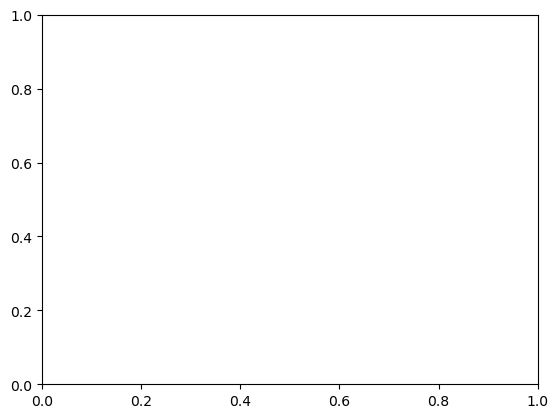

In [13]:
import matplotlib.pyplot as plt


# WOA

In [ ]:
fp = "https://www.ncei.noaa.gov/thredds-ocean/fileServer/ncei/woa/temperature/decav/1.00/woa18_decav_t01_01.nc"
fp_root = "https://www.ncei.noaa.gov/thredds-ocean/fileServer/ncei/woa/"

env_var_names = ["temperature", "salinity", "oxygen", "silicate", "nitrate", "phosphate"]
env_var_ids = ["t", "s", "o", "i", "n", "p"]
env_var_dict = dict(zip(env_var_names, env_var_ids))

decade_ids = ["decav", "5564", "6574", "7584", "8594", "95A4", "A5B7", "decav81B0"]
resolutions = [0.25, 1]


def resolution_to_string(resolution) -> str:
    if resolution == 0.25:
        return "04"
    elif resolution == 1:
        return "01"
    else:
        raise ValueError("Resolution must be floats of 0.25 or 1.00")


def generate_nc_name(env_var, env_var_dict, decade_id, resolution, month_i):
    name_root = "woa18"
    id = env_var_dict[env_var]

    end = id + utils.pad_number_with_zeros(month_i, 2) + "_" + resolution_to_string(resolution) + ".nc"

    return "_".join((name_root, decade_id, end))


def return_woa_url(env_var, decade_id, resolution, nc_name) -> str:
    fp_root = "https://www.ncei.noaa.gov/thredds-ocean/fileServer/ncei/woa/"

    url = "/".join((fp_root, env_var, decade_id, resolution_to_string(resolution), nc_name))
    return str(url)


def download_woa_data(env_var_names: list[str], env_var_dict: dict, decade_ids: list[str], resolutions: list[float]):
    for env_var in env_var_names:
        for decade_id in decade_ids:
            for resolution in resolutions:
                for month_i in range(1, 13):
                    nc_name = generate_nc_name(env_var, env_var_dict, decade_id, resolution, month_i)
                    url = return_woa_url(env_var, decade_id, resolution, nc_name)
                    print(url)

# TODO: implement seasonal and annual

def format_string_list(lst):
    if not lst:
        return ""
    return "var=" + "&var=".join(lst)


def generate_identifier(var):
    if var == "mld":
        return "A5B7"
    elif var == "temperature":
        return "5564"
    else:
        return "all"
    

def format_bounds(lat_bounds, lon_bounds):

    # Check latitude bounds
    assert all(-90 <= lat <= 90 for lat in lat_bounds), "Latitude values must be between -90 and 90"
    # Check longitude bounds
    assert all(-180 <= lon <= 180 for lon in lon_bounds), "Longitude values must be between -180 and 180"

    north, south = sorted(lat_bounds, reverse=True)
    east, west = sorted(lon_bounds)

    result = f"north={north}&west={west}&east={east}&south={south}"
    return result

# format_string_list(["asdf", "asdf", "asdf"])
format_bounds([-10, 10], [150, 180])


download_woa_data(env_var_names, env_var_dict, decade_ids, resolutions)

In [ ]:
woa_test_p = "/home/rt582/rds/hpc-work/coralshift/data/env_vars/1_woa18_5564_t16_01 (1).nc"
woa_test = spatial_data.process_xa_d(xa.open_dataset(woa_test_p, decode_times=False))

spatial_plots.plot_spatial(woa_test["t_an"].isel(time=0, depth=0))

# CMIP


In [ ]:
temp = spatial_data.process_xa_d(xa.open_dataset("/home/rt582/rds/hpc-work/coralshift/data/env_vars/evspsbl_Primday_HadGEM3-GC31-HH_control-1950_r1i1p1f1_gn_19500101-19500330.nc"))

# TODO: include this in process_xa_d
temp = temp.convert_calendar(calendar="gregorian", align_on="date", missing=-999)

from coralshift.plotting import spatial_plots
from coralshift.processing import spatial_data



spatial_plots.plot_spatial(temp["evspsbl"].isel(time=0))